In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv("C:/Users/yasin/Desktop/dersler2/machinelearning/data/data.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.drop(["Unnamed: 32","id"],axis=1, inplace=True)

In [7]:
M=data[data.diagnosis=="M"]  ##iyi ve kötü ayırdık
B=data[data.diagnosis=="B"]

Text(0, 0.5, 'area')

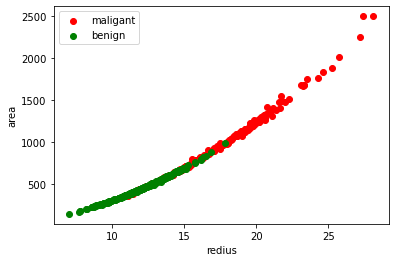

In [10]:
plt.scatter(M.radius_mean,M.area_mean,color="red",label="maligant")
plt.scatter(B.radius_mean,B.area_mean,color="green",label="benign")
plt.legend()
plt.xlabel("redius")
plt.ylabel("area")


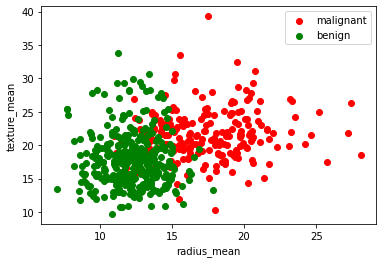

In [11]:
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="malignant") 
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="benign")
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()

In [12]:
data.diagnosis = [1 if each=="M" else 0 for each in data.diagnosis]
y=data.diagnosis.values
x_data= data.iloc[:,1:3].values

In [13]:
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)


In [23]:
##knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) #n_neighbors -> k değeri
knn.fit(x_train,y_train)
y_head = knn.predict(x_test)
y_head

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

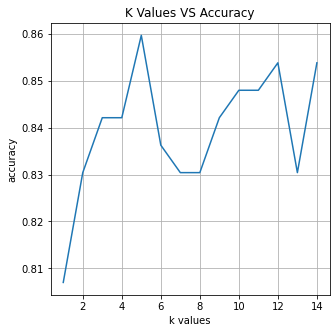

Best accuracy is 0.8596491228070176 with K = 5


In [24]:
##en iyi k değerini bulmak için k değerlerini deniyoruz
test_accuracy = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    test_accuracy.append(knn2.score(x_test,y_test))
    
plt.figure(figsize=(5,5))
plt.plot(range(1,15),test_accuracy)
plt.title('K Values VS Accuracy')
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.grid()
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

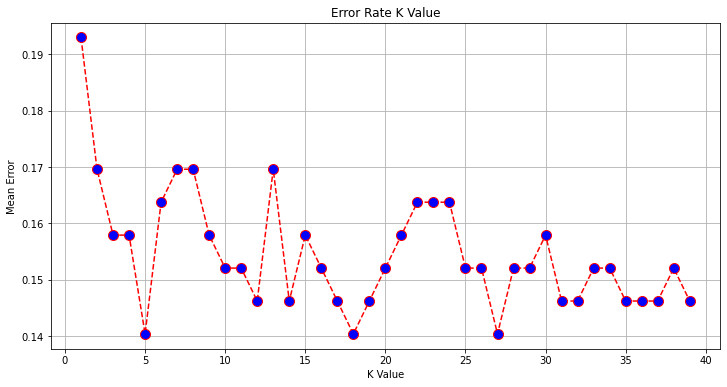

In [22]:
error = []
for i in range (1,40):
  knn= KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i = knn.predict(x_test)
  error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.grid()
plt.show()

In [28]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

In [29]:
iris=load_iris()
x,y=iris.data,iris.target

In [30]:
kd =KFold(n_splits=5,shuffle=True,random_state=42)

In [32]:
model=LinearRegression()

In [34]:
scores=[]
for train_index,test_index in kd.split(x):
    x_train,x_test =x[train_index],x[test_index]
    y_train,y_test =y[train_index],y[test_index]
    
    model.fit(x_train,y_train)
    
    y_pred=model.predict(x_test)
    
    score =mean_squared_error(y_test,y_pred)
    
    scores.append(score)

In [35]:
mean_score=np.mean(scores)

In [37]:
print("k fold cross valid",scores)
print("ortalama hata",mean_score)

k fold cross valid [0.03711379440797687, 0.042877331697643725, 0.053395130468897614, 0.06316425044891769, 0.04779460065443835]
ortalama hata 0.04886902153557485


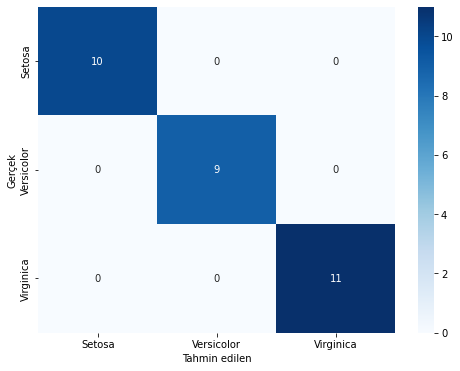

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)


labels = ['Setosa', 'Versicolor', 'Virginica']
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(8,6))
sns.heatmap(df_cm, annot=True, cmap=plt.cm.Blues) 
plt.xlabel('Tahmin edilen')
plt.ylabel('Gerçek')
plt.show()

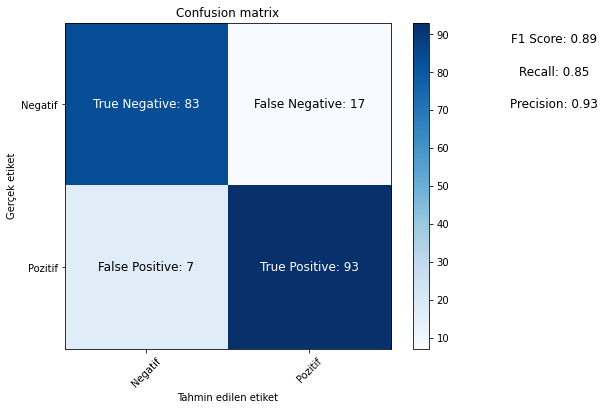

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_classes=2, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=120)


clf = LogisticRegression()
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


cm = confusion_matrix(y_test, y_pred)


tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

plt.figure(figsize=(8,6))
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Negatif', 'Pozitif'], rotation=45)
plt.yticks(tick_marks, ['Negatif', 'Pozitif'])
plt.xlabel('Tahmin edilen etiket')
plt.ylabel('Gerçek etiket')
plt.text(0, 0, f"True Negative: {tn}", ha="center", va="center", color="white", fontsize=12)
plt.text(0, 1, f"False Positive: {fp}", ha="center", va="center", color="black", fontsize=12)
plt.text(1, 0, f"False Negative: {fn}", ha="center", va="center", color="black", fontsize=12)
plt.text(1, 1, f"True Positive: {tp}", ha="center", va="center", color="white", fontsize=12)
plt.text(2.5, 0, f"Precision: {precision:.2f}", ha="center", va="center", color="black", fontsize=12)
plt.text(2.5, -0.2, f"Recall: {recall:.2f}", ha="center", va="center", color="black", fontsize=12)
plt.text(2.5, -0.4, f"F1 Score: {f1_score:.2f}", ha="center", va="center", color="black", fontsize=12)
plt.show()
